**Importiere die notwendigen Packages**

In [2]:
import pandas as pd
import pivottablejs
from pivottablejs import pivot_ui
import numpy as np
import altair as alt
import matplotlib.pyplot as plt
from datetime import datetime
import geopandas as gpd
import folium 



Definiere Settings. Hier das Zahlenformat von Float-Werten (z.B. *'{:,.2f}'.format* mit Komma als Tausenderzeichen), 

In [69]:
pd.options.display.float_format = '{:.0f}'.format
pd.set_option('display.width', 100)
pd.set_option('display.max_columns', 15)

Importiere einen Datensatz von der **DWH_INT** Dropzone.

- Beachte dabei die Notation des Pfades...
- Definiere mal aktuell noch keine weiteren Parameter beim Import

**Dataset auf INTEG Datenkatalog**: https://data.integ.stadt-zuerich.ch/dataset/int_dwh_prd_ssz_gang-dur-zueri_od1005

In [70]:
# Filepath
fp = r"//szh.loc/ssz/applikationen/OGD_Dropzone/INT_DWH/prd_ssz_gang-dur-zueri_od1005/BEV100OD1005.csv"
fp_prod = r"//szh.loc/ssz/applikationen/OGD_Dropzone/DWH/prd_ssz_gang-dur-zueri_od1005/BEV100OD1005.csv"
fp_int = r"//szh.loc/ssz/applikationen/OGD_Dropzone/INT_DWH/prd_ssz_gang-dur-zueri_od1005/BEV100OD1005.csv"
# Read the data
data2betested = pd.read_csv(
    fp, 
    sep=',',
   #usecols=[0,1,2,3,4,6],
   #names=['stationid','year','month','avgtemp','latitude','longitude','elevation','station','countryid','country'],
   #skiprows=1,
   # parse_dates=[0],
    parse_dates=True,
    #date_parser=lambda x: pd.to_datetime(x, format="%Y"), 
    #index_col="date_time",
    low_memory=False    
    )

dataBisher = pd.read_csv(
    fp_prod, 
    sep=',',
   #usecols=[0,1,2,3,4,6],
   #names=['stationid','year','month','avgtemp','latitude','longitude','elevation','station','countryid','country'],
   #skiprows=1,
   # parse_dates=[0],
    parse_dates=True,
    #date_parser=lambda x: pd.to_datetime(x, format="%Y"), 
    #index_col="date_time",
    low_memory=False    
    )

In der Folge ein paar erste Tests:

In [71]:
type(data2betested)

pandas.core.frame.DataFrame

 - 1) Zeige eine kurze Vorschau der importierten Daten
 - 2) Weise die Datentypen aus
 - 3) Zeige die Shape (Umfang) des Datensatzes an

In [72]:
data2betested.head(3)

,RaumNr,Raum,Oberthema,Zahl,Thema,Vergleichszahl,Vergleichstext,Bemerkungen
0,0,Ganze Stadt,Stadtgebiet,92,Fläche in Quadratkilometer,12869,Anzahl Fussballfelder,Datenquelle: Gebäude- und Wohnungsregister (2020)
1,1,Kreis 1,Stadtgebiet,2,Fläche in Quadratkilometer,252,Anzahl Fussballfelder,Datenquelle: Gebäude- und Wohnungsregister (2020)
2,2,Kreis 2,Stadtgebiet,11,Fläche in Quadratkilometer,1550,Anzahl Fussballfelder,Datenquelle: Gebäude- und Wohnungsregister (2020)


In [73]:
dataBisher.head(3)

,RaumNr,Raum,Oberthema,Zahl,Thema,Vergleichszahl,Vergleichstext,Bemerkungen
0,0,Ganze Stadt,Stadtgebiet,92,Fläche in Quadratkilometer,12870,Anzahl Fussballfelder,Datenquelle: Gebäude- und Wohnungsregister (2019)
1,1,Kreis 1,Stadtgebiet,2,Fläche in Quadratkilometer,252,Anzahl Fussballfelder,Datenquelle: Gebäude- und Wohnungsregister (2019)
2,2,Kreis 2,Stadtgebiet,11,Fläche in Quadratkilometer,1550,Anzahl Fussballfelder,Datenquelle: Gebäude- und Wohnungsregister (2019)


In [74]:
data2betested.dtypes

RaumNr              int64
Raum               object
Oberthema          object
Zahl              float64
Thema              object
Vergleichszahl    float64
Vergleichstext     object
Bemerkungen        object
dtype: object

In [75]:
dataBisher.dtypes

RaumNr              int64
Raum               object
Oberthema          object
Zahl              float64
Thema              object
Vergleichszahl    float64
Vergleichstext     object
Bemerkungen        object
dtype: object

In [76]:
data2betested.shape

(2162, 8)

In [77]:
dataBisher.shape

(2162, 8)

Beschreibe einzelne Attribute

In [78]:
data2betested.describe()

,RaumNr,Zahl,Vergleichszahl
count,2162,2154,235
mean,475,2317,223
std,467,16263,901
min,0,0,0
25%,11,10,10
50%,410,62,40
75%,820,658,158
max,9990,491193,12869


In [79]:
#dataBisher.describe()

Wie viele Nullwerte gibt es im Datensatz?

In [80]:
data2betested.isnull().sum()

RaumNr               0
Raum                 0
Oberthema            0
Zahl                 8
Thema                0
Vergleichszahl    1927
Vergleichstext       0
Bemerkungen          0
dtype: int64

Wandle die Spalte Jahr von Int zu **Datetime** um. Dies wird in den meisten Grafiken so benötigt.

In [81]:
#data2betested['StichtagDatJahr']=pd.to_datetime(data2betested['StichtagDatJahr'], format='%Y')
data2betested['Bemerkungen']
#TO DO --> setze das Datum auf den 31.12. der Jahres.
#test=data2betested[['StichtagDatJahr']].date().replace(month=12, day=31)

data2betested

,RaumNr,Raum,Oberthema,Zahl,Thema,Vergleichszahl,Vergleichstext,Bemerkungen
0,0,Ganze Stadt,Stadtgebiet,92,Fläche in Quadratkilometer,12869,Anzahl Fussballfelder,Datenquelle: Gebäude- und Wohnungsregister (2020)
1,1,Kreis 1,Stadtgebiet,2,Fläche in Quadratkilometer,252,Anzahl Fussballfelder,Datenquelle: Gebäude- und Wohnungsregister (2020)
2,2,Kreis 2,Stadtgebiet,11,Fläche in Quadratkilometer,1550,Anzahl Fussballfelder,Datenquelle: Gebäude- und Wohnungsregister (2020)
3,3,Kreis 3,Stadtgebiet,9,Fläche in Quadratkilometer,1212,Anzahl Fussballfelder,Datenquelle: Gebäude- und Wohnungsregister (2020)
4,4,Kreis 4,Stadtgebiet,3,Fläche in Quadratkilometer,407,Anzahl Fussballfelder,Datenquelle: Gebäude- und Wohnungsregister (2020)
...,...,...,...,...,...,...,...,...
2157,1150,Oerlikon,Verkehr,14,Mobility Standorte,NaN,Keine Vergleichszahl,Datenquelle: Tiefbau- und Entsorgungsdeparteme...
2158,1190,Seebach,Verkehr,8,Mobility Standorte,NaN,Keine Vergleichszahl,Datenquelle: Tiefbau- und Entsorgungsdeparteme...
2159,1210,Saatlen,Verkehr,3,Mobility Standorte,NaN,Keine Vergleichszahl,Datenquelle: Tiefbau- und Entsorgungsdeparteme...
2160,1220,Schwamendingen-Mitte,Verkehr,5,Mobility Standorte,NaN,Keine Vergleichszahl,Datenquelle: Tiefbau- und Entsorgungsdeparteme...


Bereite die Daten für die Grafik unten vor

In [82]:
Bemerkungen = data2betested.groupby("Bemerkungen")
len(Bemerkungen)


56

In [83]:
BemerkungenBisher = dataBisher.groupby("Bemerkungen")
len(BemerkungenBisher)

49

In [84]:
for key, group in Bemerkungen:
    print(key, len(group))

Datenquelle: Bevölkerungsregister (2020) 517
Datenquelle: Bevölkerungsregister (2020), Wegziehende aus bestimmtem Gebiet (Stadt, Kreis oder Quartier) 47
Datenquelle: Bevölkerungsregister (2020), Zuziehende in bestimmtes Gebiet (Stadt, Kreis oder Quartier) 47
Datenquelle: Departement der Industriellen Betriebe (laufende Nachführung) 47
Datenquelle: Gebäude- und Wohnungsregister (2020) 609
Datenquelle: SECO, Arbeitslosenzahlen (Datenstand: 05.01.2020) 49
Datenquelle: STATENT (2018, Daten provisorisch) 274
Datenquelle: STATENT (2018, Daten provisorisch,				weil Zahl zwischen 1 und 3 liegt, darf sie gemäss BFS nicht ausgewiesen werden) 8
Datenquelle: Schul- und Sportdepartement (laufende Nachführung) 235
Datenquelle: Sozialdepartement (laufende Nachführung) 47
Datenquelle: Strassenverkehrsamt Kanton Zürich (2020), Fahrzeughalter/-innen: Nur natürliche Personen 94
Datenquelle: Tiefbau- und Entsorgungsdepartement (laufende Nachführung) 94
Datenquellen: SECO (Arbeitslosenzahlen, Datenstand: 0

In [85]:
for key, group in BemerkungenBisher:
    print(key, len(group))

Datenquelle: Bevölkerungsregister (2019) 517
Datenquelle: Bevölkerungsregister (2019), Wegziehende aus bestimmtem Gebiet (Stadt, Kreis oder Quartier) 47
Datenquelle: Bevölkerungsregister (2019), Zuziehende in bestimmtes Gebiet (Stadt, Kreis oder Quartier) 47
Datenquelle: Departement der Industriellen Betriebe (laufende Nachführung) 47
Datenquelle: Gebäude- und Wohnungsregister (2019) 609
Datenquelle: SECO, Arbeitslosenzahlen (2019) 49
Datenquelle: STATENT (2017, Daten provisorisch) 275
Datenquelle: STATENT (2017, Daten provisorisch,				weil Zahl zwischen 1 und 3 liegt, darf sie gemäss BFS nicht ausgewiesen werden) 7
Datenquelle: Schul- und Sportdepartement (laufende Nachführung) 235
Datenquelle: Sozialdepartement (laufende Nachführung) 47
Datenquelle: Strassenverkehrsamt Kanton Zürich (2019), Fahrzeughalter/-innen: Nur natürliche Personen 94
Datenquelle: Tiefbau- und Entsorgungsdepartement (laufende Nachführung) 94
Datenquellen: SECO (Arbeitslosenzahlen, 2019) und Strukturerhebung (Erw

**Selektionen und Aggregationen**

Check this [Doku](https://www.shanelynn.ie/summarising-aggregation-and-grouping-data-in-python-pandas/)

In [86]:
data2betested

,RaumNr,Raum,Oberthema,Zahl,Thema,Vergleichszahl,Vergleichstext,Bemerkungen
0,0,Ganze Stadt,Stadtgebiet,92,Fläche in Quadratkilometer,12869,Anzahl Fussballfelder,Datenquelle: Gebäude- und Wohnungsregister (2020)
1,1,Kreis 1,Stadtgebiet,2,Fläche in Quadratkilometer,252,Anzahl Fussballfelder,Datenquelle: Gebäude- und Wohnungsregister (2020)
2,2,Kreis 2,Stadtgebiet,11,Fläche in Quadratkilometer,1550,Anzahl Fussballfelder,Datenquelle: Gebäude- und Wohnungsregister (2020)
3,3,Kreis 3,Stadtgebiet,9,Fläche in Quadratkilometer,1212,Anzahl Fussballfelder,Datenquelle: Gebäude- und Wohnungsregister (2020)
4,4,Kreis 4,Stadtgebiet,3,Fläche in Quadratkilometer,407,Anzahl Fussballfelder,Datenquelle: Gebäude- und Wohnungsregister (2020)
...,...,...,...,...,...,...,...,...
2157,1150,Oerlikon,Verkehr,14,Mobility Standorte,NaN,Keine Vergleichszahl,Datenquelle: Tiefbau- und Entsorgungsdeparteme...
2158,1190,Seebach,Verkehr,8,Mobility Standorte,NaN,Keine Vergleichszahl,Datenquelle: Tiefbau- und Entsorgungsdeparteme...
2159,1210,Saatlen,Verkehr,3,Mobility Standorte,NaN,Keine Vergleichszahl,Datenquelle: Tiefbau- und Entsorgungsdeparteme...
2160,1220,Schwamendingen-Mitte,Verkehr,5,Mobility Standorte,NaN,Keine Vergleichszahl,Datenquelle: Tiefbau- und Entsorgungsdeparteme...


In [87]:

# produces Pandas Series
    #data2betested.groupby(['StichtagDatJahr', 'KonOGDSort'])['AnzBestWir'].sum()
# Produces Pandas DataFrame
    #data2betested.groupby(['StichtagDatJahr', 'KonOGDSort'])[['AnzBestWir']].sum()
    

**Einfache Visualisierungen zur Plausi**

Exploriere die Daten mit Pivottable.JS

In [88]:
from pivottablejs import pivot_ui

pivot_ui(data2betested)

Liniendiagramm 
[Link zur Doku](https://altair-viz.github.io/gallery/multiline_highlight.html)

In [104]:
mySelection = data2betested[((data2betested.Raum == "Friesenberg") | (data2betested.Raum == "Oberstrass" )) & ((data2betested.Oberthema == "Stadtgebiet") | (data2betested.Oberthema == "Bauen & Wohnen"))]
mySelection.head(1500)


,RaumNr,Raum,Oberthema,Zahl,Thema,Vergleichszahl,Vergleichstext,Bemerkungen
21,330,Friesenberg,Stadtgebiet,5,Fläche in Quadratkilometer,742,Anzahl Fussballfelder,Datenquelle: Gebäude- und Wohnungsregister (2020)
29,630,Oberstrass,Stadtgebiet,3,Fläche in Quadratkilometer,369,Anzahl Fussballfelder,Datenquelle: Gebäude- und Wohnungsregister (2020)
68,330,Friesenberg,Stadtgebiet,51,Anteil der Waldfläche in %,NaN,Keine Vergleichszahl,Datenquelle: Gebäude- und Wohnungsregister (2020)
76,630,Oberstrass,Stadtgebiet,39,Anteil der Waldfläche in %,NaN,Keine Vergleichszahl,Datenquelle: Gebäude- und Wohnungsregister (2020)
115,330,Friesenberg,Stadtgebiet,1,Anteil der Gewässerfläche in %,NaN,Keine Vergleichszahl,Datenquelle: Gebäude- und Wohnungsregister (2020)
123,630,Oberstrass,Stadtgebiet,0,Anteil der Gewässerfläche in %,NaN,Keine Vergleichszahl,Datenquelle: Gebäude- und Wohnungsregister (2020)
162,330,Friesenberg,Stadtgebiet,47,Brunnen,NaN,Keine Vergleichszahl,Datenquelle: Departement der Industriellen Bet...
170,630,Oberstrass,Stadtgebiet,35,Brunnen,NaN,Keine Vergleichszahl,Datenquelle: Departement der Industriellen Bet...
209,330,Friesenberg,Stadtgebiet,3071,Bäume,NaN,Keine Vergleichszahl,Datenquelle: Tiefbau- und Entsorgungsdeparteme...
217,630,Oberstrass,Stadtgebiet,1928,Bäume,NaN,Keine Vergleichszahl,Datenquelle: Tiefbau- und Entsorgungsdeparteme...


In [105]:
mySelection2 = dataBisher[((dataBisher.Raum == "Friesenberg") | (dataBisher.Raum == "Oberstrass" )) & ((dataBisher.Oberthema == "Stadtgebiet") | (dataBisher.Oberthema == "Bauen & Wohnen"))]
mySelection2.head(1500)

,RaumNr,Raum,Oberthema,Zahl,Thema,Vergleichszahl,Vergleichstext,Bemerkungen
21,330,Friesenberg,Stadtgebiet,5,Fläche in Quadratkilometer,742,Anzahl Fussballfelder,Datenquelle: Gebäude- und Wohnungsregister (2019)
29,630,Oberstrass,Stadtgebiet,3,Fläche in Quadratkilometer,369,Anzahl Fussballfelder,Datenquelle: Gebäude- und Wohnungsregister (2019)
68,330,Friesenberg,Stadtgebiet,51,Anteil der Waldfläche in %,NaN,Keine Vergleichszahl,Datenquelle: Gebäude- und Wohnungsregister (2019)
76,630,Oberstrass,Stadtgebiet,39,Anteil der Waldfläche in %,NaN,Keine Vergleichszahl,Datenquelle: Gebäude- und Wohnungsregister (2019)
115,330,Friesenberg,Stadtgebiet,1,Anteil der Gewässerfläche in %,NaN,Keine Vergleichszahl,Datenquelle: Gebäude- und Wohnungsregister (2019)
123,630,Oberstrass,Stadtgebiet,0,Anteil der Gewässerfläche in %,NaN,Keine Vergleichszahl,Datenquelle: Gebäude- und Wohnungsregister (2019)
162,330,Friesenberg,Stadtgebiet,47,Brunnen,NaN,Keine Vergleichszahl,Datenquelle: Departement der Industriellen Bet...
170,630,Oberstrass,Stadtgebiet,35,Brunnen,NaN,Keine Vergleichszahl,Datenquelle: Departement der Industriellen Bet...
209,330,Friesenberg,Stadtgebiet,3072,Bäume,NaN,Keine Vergleichszahl,Datenquelle: Tiefbau- und Entsorgungsdeparteme...
217,630,Oberstrass,Stadtgebiet,1729,Bäume,NaN,Keine Vergleichszahl,Datenquelle: Tiefbau- und Entsorgungsdeparteme...


In [67]:
# replacing blank spaces with '_' 
"""
data2betested.columns =[column.replace(" ", "_") for column in data2betested.columns]
len(data2betested.columns)
"""

'\ndata2betested.columns =[column.replace(" ", "_") for column in data2betested.columns]\nlen(data2betested.columns)\n'

In [189]:
data2betested.columns       


Index(['RaumNr', 'Raum', 'Oberthema', 'Zahl', 'Thema', 'Vergleichszahl', 'Vergleichstext',
       'Bemerkungen'],
      dtype='object')

In [190]:
#mySelection = aktuellesJahr[["StatZoneSort","AnzBestWir"]]
#mySelection
#mySelection = data2betested[((data2betested.Raum == "Friesenberg") | (data2betested.Raum == "Oberstrass" )) & ((data2betested.Oberthema == "Stadtgebiet") | (data2betested.Oberthema == "Bauen & Wohnen"))]
mySelection = data2betested[(data2betested.RaumNr > 15) & ((data2betested.Oberthema == "Stadtgebiet") | (data2betested.Oberthema == "Verkehr"))]
mySelection.head()

,RaumNr,Raum,Oberthema,Zahl,Thema,Vergleichszahl,Vergleichstext,Bemerkungen
13,110,Rathaus,Stadtgebiet,0,Fläche in Quadratkilometer,50,Anzahl Fussballfelder,Datenquelle: Gebäude- und Wohnungsregister (2020)
14,120,Hochschulen,Stadtgebiet,1,Fläche in Quadratkilometer,81,Anzahl Fussballfelder,Datenquelle: Gebäude- und Wohnungsregister (2020)
15,130,Lindenhof,Stadtgebiet,0,Fläche in Quadratkilometer,37,Anzahl Fussballfelder,Datenquelle: Gebäude- und Wohnungsregister (2020)
16,140,City,Stadtgebiet,1,Fläche in Quadratkilometer,83,Anzahl Fussballfelder,Datenquelle: Gebäude- und Wohnungsregister (2020)
17,210,Wollishofen,Stadtgebiet,6,Fläche in Quadratkilometer,810,Anzahl Fussballfelder,Datenquelle: Gebäude- und Wohnungsregister (2020)


In [191]:
mySelection2 = data2betested[(data2betested.RaumNr > 15) & ((data2betested.Oberthema == "Stadtgebiet") | (data2betested.Oberthema == "Verkehr"))]
mySelection2.head()

,RaumNr,Raum,Oberthema,Zahl,Thema,Vergleichszahl,Vergleichstext,Bemerkungen
13,110,Rathaus,Stadtgebiet,0,Fläche in Quadratkilometer,50,Anzahl Fussballfelder,Datenquelle: Gebäude- und Wohnungsregister (2020)
14,120,Hochschulen,Stadtgebiet,1,Fläche in Quadratkilometer,81,Anzahl Fussballfelder,Datenquelle: Gebäude- und Wohnungsregister (2020)
15,130,Lindenhof,Stadtgebiet,0,Fläche in Quadratkilometer,37,Anzahl Fussballfelder,Datenquelle: Gebäude- und Wohnungsregister (2020)
16,140,City,Stadtgebiet,1,Fläche in Quadratkilometer,83,Anzahl Fussballfelder,Datenquelle: Gebäude- und Wohnungsregister (2020)
17,210,Wollishofen,Stadtgebiet,6,Fläche in Quadratkilometer,810,Anzahl Fussballfelder,Datenquelle: Gebäude- und Wohnungsregister (2020)


In [192]:
# df_statzonen = df_statzonen[(df_statzonen.knr>0) & (df_statzonen.qname!="Hirslanden")]
#aktuellesJahr[[aktuellesJahr.KreisSort =7]])
highlight = alt.selection(type='single', on='mouseover',
                          fields=['Thema'], nearest=True)
#x='date:StichtagDatJahr',
base = alt.Chart(mySelection).encode(
    x='Raum',
    y='Zahl',
    color='Thema'
)

points = base.mark_circle().encode(
    opacity=alt.value(0)
).add_selection(
    highlight
).properties(
    width=700 , height=300
)
lines = base.mark_line().encode(
    size=alt.condition(~highlight, alt.value(1.5), alt.value(4))
).interactive()

points + lines

alt.LayerChart(...)

In [193]:
alt.Chart(mySelection).mark_circle(size=60).encode(
    x='Raum',
    y='Zahl',
    color='Thema',
    tooltip=['Raum','Zahl','Thema']
).interactive() # this makes the axes interactive: now you can zoom & pan



alt.Chart(...)

In [194]:
alt.Chart(mySelection2).mark_circle(size=60).encode(
    x='Raum',
    y='Zahl',
    color='Thema',
    tooltip=['Raum','Zahl','Thema']
).interactive() # this makes the axes interactive: now you can zoom & pan

alt.Chart(...)

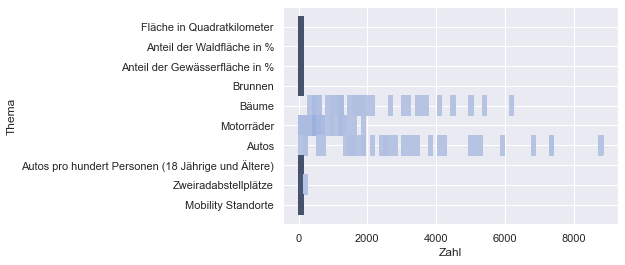

In [195]:
import seaborn as sns
sns.set(style="darkgrid")
sns.histplot(data=mySelection, x="Zahl", y="Thema") #, y="KonOGDKurz")
plt.show();

Test: Choroplethenkarte

**Test: Choroplethenkarte**
Importiere die Geodaten als GeoJSON

In [196]:
# Read abt. Geopandas https://geopandas.org/docs/user_guide/io.html
# Wenn die Daten lokal agelegt sind, dann kannst Du folgendes machen:
##input_stadtquartiere = r"//szh.loc/ssz/data/GIS/Daten/Vektor/_aktuell/stzh.adm_statistische_quartiere_map.json"
##df_stadtquartiere = gpd.read_file(input_stadtquartiere)
##df_stadtquartiere.head(2)
#df_stadtkreise.dtypes

quart_geojson_url = "https://www.ogd.stadt-zuerich.ch/wfs/geoportal/Statistische_Quartiere?service=WFS&version=1.1.0&request=GetFeature&outputFormat=GeoJSON&typename=adm_statistische_quartiere_map"
df_adm_statistische_quartiere_map = gpd.read_file(quart_geojson_url)

statz_geojson_url = "https://www.ogd.stadt-zuerich.ch/wfs/geoportal/Statistische_Zonen?service=WFS&version=1.1.0&request=GetFeature&outputFormat=GeoJSON&typename=adm_statzonen_map"
df_adm_statzonen_map = gpd.read_file(statz_geojson_url)


#df_adm_statistische_quartiere_map.head(5)
df_adm_statzonen_map.head(5)


,id,kname,knr,objectid,objid,qname,qnr,stzname,stznr,geometry
0,adm_statzonen_map.1,Kreis 7,7,1,154,Hirslanden,73,Hegibach,7303,"POLYGON ((8.55670 47.36406, 8.55682 47.36410, ..."
1,adm_statzonen_map.2,Kreis 7,7,2,89,Hirslanden,73,Klus,7302,"POLYGON ((8.57281 47.35806, 8.57278 47.35807, ..."
2,adm_statzonen_map.3,Kreis 7,7,3,88,Hirslanden,73,Degenried,7301,"POLYGON ((8.59087 47.36850, 8.59066 47.36823, ..."
3,adm_statzonen_map.37,Kreis 2,2,37,153,Enge,24,Gartenstrasse,2406,"POLYGON ((8.53741 47.36846, 8.53731 47.36841, ..."
4,adm_statzonen_map.4,Kreis 8,8,4,105,Weinegg,83,Neumünster,8301,"POLYGON ((8.55670 47.36405, 8.55672 47.36403, ..."


Joine die importierten statistischen Daten des aktuellen Jahres zum Geodatensatz:

*Siehe dazu Doku zu [Geopandas](https://geopandas.org/docs/user_guide/mergingdata.html)*

In [229]:
# Rename attribute stznr to StatZoneSort, so the IDs have the same name
"""
statzonen_shapes = df_adm_statzonen_map[['geometry', 'stznr']].rename(columns={'stznr': 'StatZoneSort'})

# Merge with `merge` method on shared variable (stznr und StatZoneSort):
statzonen_shapes_aktJahr = statzonen_shapes.merge(aktuellesJahr, on='StatZoneSort')

statzonen_shapes_aktJahr.head(3)

"""

mySelectionCpy = mySelection.copy()
mySelectionCpy['calc_qnr']= 0
mySelectionCpy['calc_qnr'] = mySelection['RaumNr']/10
mySelectionCpyMobility = mySelectionCpy[(data2betested.Thema == "Mobility Standorte")]
mySelectionCpyTrees = mySelectionCpy[(data2betested.Thema == "Bäume")]

mySelectionCpyTrees.head(3)

<ipython-input-229-34c1ebfbed98>:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  mySelectionCpyMobility = mySelectionCpy[(data2betested.Thema == "Mobility Standorte")]
<ipython-input-229-34c1ebfbed98>:16: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  mySelectionCpyTrees = mySelectionCpy[(data2betested.Thema == "Bäume")]


,RaumNr,Raum,Oberthema,Zahl,Thema,Vergleichszahl,Vergleichstext,Bemerkungen,calc_qnr
201,110,Rathaus,Stadtgebiet,318,Bäume,NaN,Keine Vergleichszahl,Datenquelle: Tiefbau- und Entsorgungsdeparteme...,11
202,120,Hochschulen,Stadtgebiet,504,Bäume,NaN,Keine Vergleichszahl,Datenquelle: Tiefbau- und Entsorgungsdeparteme...,12
203,130,Lindenhof,Stadtgebiet,507,Bäume,NaN,Keine Vergleichszahl,Datenquelle: Tiefbau- und Entsorgungsdeparteme...,13


In [232]:
stat_quartiere_shapes = df_adm_statistische_quartiere_map[['geometry', 'qnr']].rename(columns={'qnr': 'calc_qnr'})
stat_quartiere_shapes

#Merge with `merge` method on shared variable (stznr und StatZoneSort):
stat_quartiere_shapes_aktJahr_Mobility = stat_quartiere_shapes.merge(mySelectionCpyMobility, on='calc_qnr')
stat_quartiere_shapes_aktJahr_Trees = stat_quartiere_shapes.merge(mySelectionCpyTrees, on='calc_qnr')

stat_quartiere_shapes_aktJahr_Trees.head(3)


,geometry,calc_qnr,RaumNr,Raum,Oberthema,Zahl,Thema,Vergleichszahl,Vergleichstext,Bemerkungen
0,"POLYGON ((8.55670 47.36406, 8.55682 47.36410, ...",73,730,Hirslanden,Stadtgebiet,568,Bäume,NaN,Keine Vergleichszahl,Datenquelle: Tiefbau- und Entsorgungsdeparteme...
1,"POLYGON ((8.55670 47.36405, 8.55672 47.36403, ...",83,830,Weinegg,Stadtgebiet,2654,Bäume,NaN,Keine Vergleichszahl,Datenquelle: Tiefbau- und Entsorgungsdeparteme...
2,"POLYGON ((8.55423 47.36456, 8.55426 47.36452, ...",82,820,Mühlebach,Stadtgebiet,523,Bäume,NaN,Keine Vergleichszahl,Datenquelle: Tiefbau- und Entsorgungsdeparteme...


<AxesSubplot:>

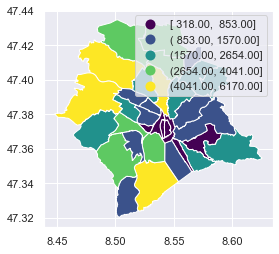

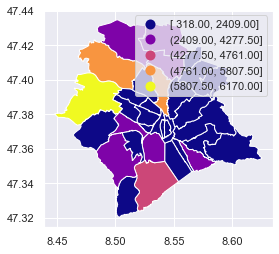

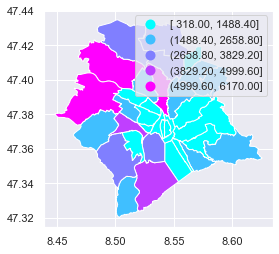

In [234]:
# Plot 

#Scheme must be in the set: dict_keys(['boxplot', 'equalinterval', 'fisherjenks', 'fisherjenkssampled', 'headtailbreaks', 'jenkscaspall', 'jenkscaspallforced', 'jenkscaspallsampled', 'maxp', 
#                                      'maximumbreaks', 'naturalbreaks', 'quantiles', 'percentiles', 'stdmean', 'userdefined'])

stat_quartiere_shapes_aktJahr_Trees.plot(column='Zahl', cmap='viridis', scheme='natural_breaks', legend=True )
#scheme werte: https://matplotlib.org/2.0.2/users/colormaps.html

stat_quartiere_shapes_aktJahr_Trees.plot(column='Zahl', cmap='plasma', scheme='maximumbreaks', legend=True )
#scheme werte: https://matplotlib.org/2.0.2/users/colormaps.html
stat_quartiere_shapes_aktJahr_Trees.plot(column='Zahl', cmap='cool', scheme='equalinterval', legend=True )
#scheme werte: https://matplotlib.org/2.0.2/users/colormaps.html

<AxesSubplot:>

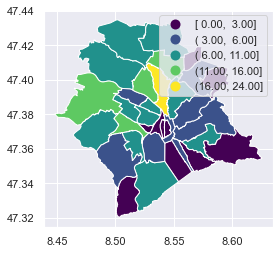

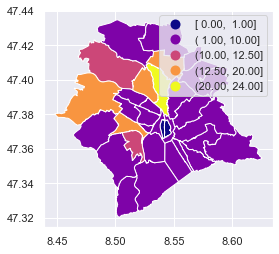

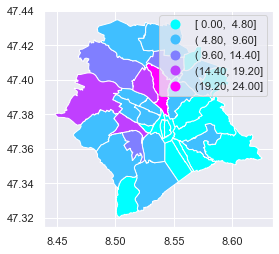

In [233]:
# Plot 

#Scheme must be in the set: dict_keys(['boxplot', 'equalinterval', 'fisherjenks', 'fisherjenkssampled', 'headtailbreaks', 'jenkscaspall', 'jenkscaspallforced', 'jenkscaspallsampled', 'maxp', 
#                                      'maximumbreaks', 'naturalbreaks', 'quantiles', 'percentiles', 'stdmean', 'userdefined'])

stat_quartiere_shapes_aktJahr_Mobility.plot(column='Zahl', cmap='viridis', scheme='natural_breaks', legend=True )
#scheme werte: https://matplotlib.org/2.0.2/users/colormaps.html

stat_quartiere_shapes_aktJahr_Mobility.plot(column='Zahl', cmap='plasma', scheme='maximumbreaks', legend=True )
#scheme werte: https://matplotlib.org/2.0.2/users/colormaps.html
stat_quartiere_shapes_aktJahr_Mobility.plot(column='Zahl', cmap='cool', scheme='equalinterval', legend=True )
#scheme werte: https://matplotlib.org/2.0.2/users/colormaps.html

<AxesSubplot:>

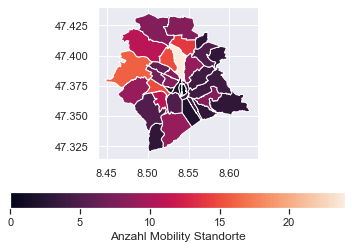

In [217]:
fig, ax = plt.subplots(1,)

stat_quartiere_shapes_aktJahr.plot(column='Zahl', ax=ax, legend=True, legend_kwds={'label': "Anzahl Mobility Standorte",'orientation': "horizontal"})


#Link https://automating-gis-processes.github.io/site/notebooks/L5/interactive-map-folium.html

# Create a Map instance
m = folium.Map(location=[60.25, 24.8], tiles = 'cartodbpositron', zoom_start=10, control_scale=True)

# Plot a choropleth map
# Notice: 'geoid' column that we created earlier needs to be assigned always as the first column
folium.Choropleth(
    geo_data=data,
    name='Population in 2018',
    data=data,
    columns=['geoid', 'pop18'],
    key_on='feature.id',
    fill_color='YlOrRd',
    fill_opacity=0.7,
    line_opacity=0.2,
    line_color='white',
    line_weight=0,
    highlight=False,
    smooth_factor=1.0,
    #threshold_scale=[100, 250, 500, 1000, 2000],
    legend_name= 'Population in Helsinki').add_to(m)

#Show map
m

Noch zu prüfen, folgendes schöne Beispiel: https://docs.bokeh.org/en/latest/docs/user_guide/interaction/legends.html

Konkrete Beispiele von Bookeh in Jupyter NB: https://docs.bokeh.org/en/latest/docs/user_guide/jupyter.html